# Donation Game Perfect and Limited Memory

**Imports**

In [2]:
import pandas as pd

import tqdm

In [3]:
import glob 

In [4]:
import matplotlib.pyplot as plt
import matplotlib

In [5]:
import matplotlib.colors as colors

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [7]:
import numpy as np

In [8]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 12,
        }

In [9]:
matplotlib.rc('font', **font)

## Analysis for low and high benefit

In [38]:
reds, blues = matplotlib.cm.get_cmap("Reds"), matplotlib.cm.get_cmap("Blues")

cmaps = [blues, reds]

In [11]:
expected_dfs = [pd.read_csv(f"../to_archieve/perfect_memory/clean_c_1_b_{b_val}_stochastic_0.csv") 
                for b_val in [3, 10]]

In [12]:
last_round_dfs = [pd.read_csv(f"../to_archieve/limited_memory/clean_c_1_b_{b_val}_stochastic_1.csv") 
                  for b_val in [3, 10]]

In [13]:
heatmaps, extents = [], []

for exp, stoch in zip(expected_dfs, last_round_dfs):
    
    for df in [exp, stoch]:
        
        ps, qs = [], []
        for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
            for _ in range(int(v)):
                ps.append(p)
                qs.append(q)


        heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)
    
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        
        heatmaps.append(heatmap)
        extents.append(extent)

In [14]:
min_ = min([heatmap.min() for heatmap in heatmaps])

max_ = max([heatmap.max() for heatmap in heatmaps])

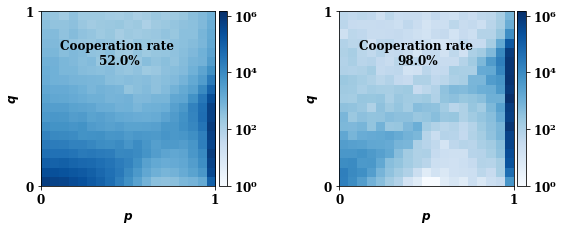

In [22]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 7.5))


cooperation_rates = [round(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)), 2) 
                     for df in expected_dfs]

for i, heatmap in enumerate([heatmaps[0], heatmaps[2]]):
    
    index = (i % 2)

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                            cmap=cmaps[0],
                            norm=colors.LogNorm(vmin=min_, vmax=max_))

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2));
    axes[index].set_xlabel("$p$")
    axes[index].set_ylabel("$q$")
    
    axes[index].text(0.45, 0.7, "Cooperation rate \n" + str(cooperation_rates[i] * 100) + '%',
                 horizontalalignment='center')


fig.tight_layout();

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.6, hspace=None)

fig.savefig("../paper/static/expected_payoffs_main.pdf", bbox_inches='tight')

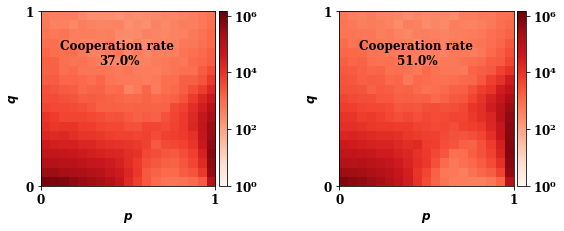

In [24]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 7.5))


cooperation_rates = [round(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)), 2) 
                     for df in last_round_dfs]

for i, heatmap in enumerate([heatmaps[1], heatmaps[-1]]):
    
    index = (i % 2)

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                            cmap=cmaps[1],
                            norm=colors.LogNorm(vmin=min_, vmax=max_))

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2));
    axes[index].set_xlabel("$p$")
    axes[index].set_ylabel("$q$")
    
    axes[index].text(0.45, 0.7, "Cooperation rate \n" + str(cooperation_rates[i] * 100) + '%',
                 horizontalalignment='center')

fig.tight_layout();

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.6, hspace=None)

fig.savefig("../paper/static/one_interaction_last_round_payoffs_main.pdf", bbox_inches='tight')

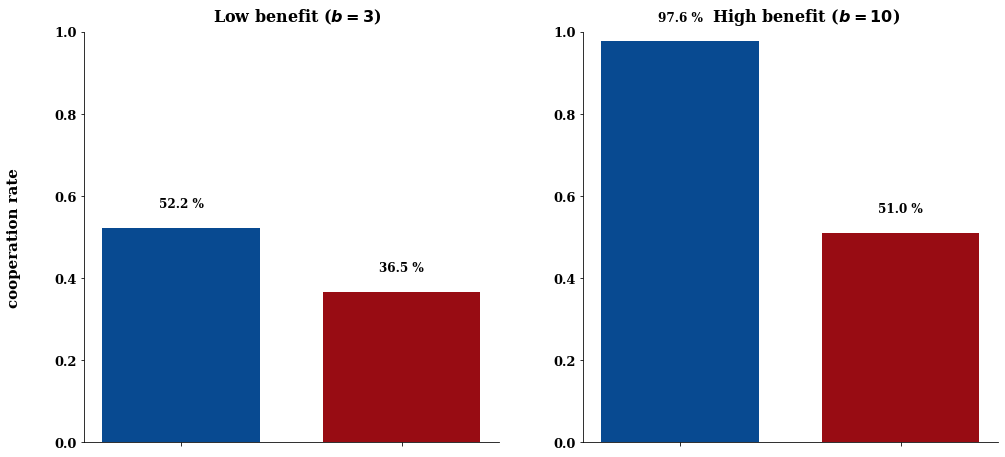

In [17]:
bars = ('perfect memory payoffs', 'limited memory payoffs')


fig, axes = plt.subplots(ncols=2, figsize=(14, 6.5));

for i in range(2):
    
    exp = expected_dfs[i]
    stoch = last_round_dfs[i]
    
    height = [sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7))
          for df in [exp, stoch]]

    x_pos = np.arange(len(bars))
    
    axes[i].bar([0, 0.07], height, width=0.05,  color=[blues(0.9), reds(0.9)])

    axes[i].set_ylim(0, 1);
#     axes[i].set_yticklabels([bars[0], bars[1]], fontsize=13);
    axes[i].set_xticks([0, 0.07,]);
    axes[i].set_xticklabels(["", ""], fontsize=13);

#     plt.xticks([0, 0.1], bars);

    for ax in [axes[i].spines["right"], axes[i].spines["top"]]:
        ax.set_visible(False);

    for j, pos in enumerate([0, 0.07]):
        axes[i].text(pos,
              height[j] + 0.05,
              f"{round(height[j], 3) * 100} %",
              horizontalalignment='center',
              color="black",
              weight='bold',
              fontsize=12
          )
        
    axes[i].tick_params(axis='both', which='major', labelsize=13)

axes[0].set_ylabel("cooperation rate", weight="bold", fontsize=15);

axes[0].yaxis.set_label_coords(-.15, .5)
for ax, label in zip(axes, ["Low benefit ($b=3$)", "High benefit ($b=10$)"]):    
    ax.text(0.01,  1.025, label, fontsize=16)

plt.tight_layout();
plt.subplots_adjust(wspace=.2)

plt.savefig("../static/cooperation_rates_expected_and_stochastic_for_donation_game.pdf")

## Analysis over parameters $b$ and $\beta$

### Benefit analysis

In [27]:
csv_files_prf = [f'../to_archieve/perfect_memory/clean_c_1_b_{b}_stochastic_0.csv' for b in range(2, 11)]
csv_files_lmt = [f'../to_archieve/limited_memory/clean_last_round_b_{b}.csv' for b in range(2, 11)]

In [28]:
dfs_perfect = []

for file, b in zip(csv_files_prf, range(2, 11)):
    df = pd.read_csv(file)
    df['b'] = b
    dfs_perfect.append(df)

In [29]:
dfs_limited = []

for file, b in zip(csv_files_lmt, range(2, 11)):
    df = pd.read_csv(file)
    df['b'] = b
    dfs_limited.append(df)

In [30]:
cooperation_rates_b_perfect = []
cooperation_rates_b_limited = []

for exp, stoch in zip(dfs_perfect, dfs_limited):
    
    cooperation_rates_b_perfect.append(
        sum(exp['average cooperation rate'] * (exp['frequencies'] / sum(exp['frequencies'])))
    )
    cooperation_rates_b_limited.append(
        sum(stoch['average cooperation rate'] * (stoch['frequencies'] / sum(stoch['frequencies'])))
    )

In [31]:
%%capture

generosity_b_perfect = []
generosity_b_limited = []

for exp, stoch in zip(dfs_perfect, dfs_limited):

    _, bins, _ = plt.hist(exp['p'], bins=19);
    generosity_b_perfect.append(np.mean(exp[exp['p'] >= bins[-2]]['q']))
    
    _, bins, _ = plt.hist(stoch['p'], bins=19);
    generosity_b_limited.append(np.mean(stoch[stoch['p'] >= bins[-2]]['q']))

### Strength of selection analysis 

In [90]:
betas = [10 ** -4, 10 ** -3, 10 ** - 2, 10 ** - 1, 10 ** 0, 10 ** 1, 10 ** 2]

csv_files_prf = [f'../to_archieve/perfect_memory/clean_beta_{beta}_stochastic_0.csv' for beta in betas]

csv_files_lr = [f'../to_archieve/limited_memory/clean_beta_{beta}_stochastic_1.csv' for beta in betas]

In [91]:
dfs_perfect = []

for file, beta in zip(csv_files_prf, betas):
    df = pd.read_csv(file)
    df['beta'] = beta
    dfs_perfect.append(df)

In [92]:
dfs_limited = []

for file, beta in zip(csv_files_lr, betas):
    df = pd.read_csv(file)
    df['beta'] = beta
    dfs_limited.append(df)

In [95]:
cooperation_rates_beta_limited = []
cooperation_rates_beta_perfect = []

for exp, stoch in zip(dfs_perfect, dfs_limited):
    
    cooperation_rates_beta_perfect.append(
        sum(exp['average cooperation rate'] * (exp['frequencies'] / sum(exp['frequencies'])))
    )
    cooperation_rates_beta_limited.append(
        sum(stoch['average cooperation rate'] * (stoch['frequencies'] / sum(stoch['frequencies'])))
    )

In [106]:
%%capture

generosity_beta_perfect = []
generosity_beta_limited = []

for exp, stoch in zip(dfs_perfect, dfs_limited):

    _, bins, _ = plt.hist(exp['p'], bins=19);
    generosity_beta_perfect.append(np.mean(exp[exp['p'] >= bins[-2]]['q']))
    
#     _, bins, _ = plt.hist(stoch['p'], bins=19);
    generosity_beta_limited.append(np.mean(stoch[stoch['p'] >= bins[-2]]['q']))
    

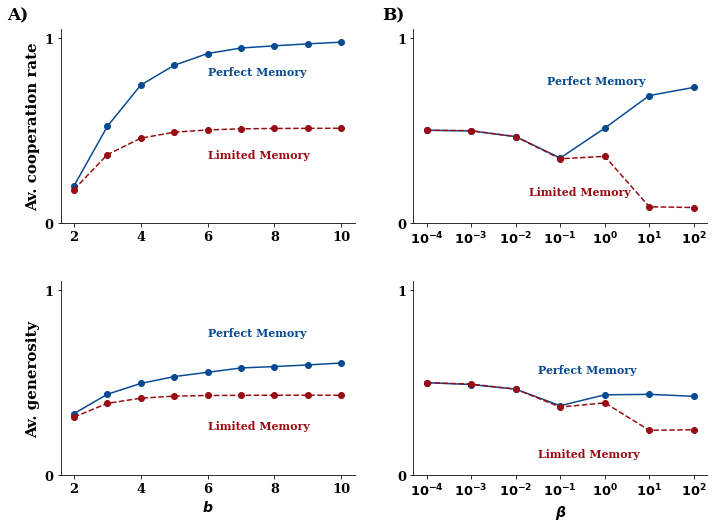

In [113]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7.5))

# Cooperation Rates For b

axes[0, 0].plot(range(2, 11), cooperation_rates_b_perfect, "-o", color=blues(0.9));
axes[0, 0].plot(range(2, 11), cooperation_rates_b_limited, "--o", color=reds(.9));

axes[0, 0].set_ylabel('Av. cooperation rate', weight="bold", fontsize=15);


axes[0, 0].text(6, .8, "Perfect Memory", fontsize=11, color=blues(.9))
axes[0, 0].text(6, .35, "Limited Memory", fontsize=11, color=reds(.9))

# Generosity Rates For b

axes[1, 0].plot(range(2, 11), generosity_b_perfect, "-o", color=blues(0.9));
axes[1, 0].plot(range(2, 11), generosity_b_limited, "--o", color=reds(.9));
axes[1, 0].set_xlabel("$b$", weight="bold", fontsize=14);
axes[1, 0].set_ylabel('Av. generosity', weight="bold", fontsize=15);

axes[1, 0].text(6, .75, "Perfect Memory", fontsize=11, color=blues(.9))
axes[1, 0].text(6, .25, "Limited Memory", fontsize=11, color=reds(.9))

# Cooperation Rates For beta

axes[0, 1].plot(range(1, 8), cooperation_rates_beta_perfect, "-o", color=blues(0.9));
axes[0, 1].plot(range(1, 8), cooperation_rates_beta_limited, "--o", color=reds(0.9));
axes[0, 1].set_xticks([1, 2, 3, 4, 5, 6, 7]);
axes[(0, 1)].set_xticklabels([r"$10^{-4}$", r"$10^{-3}$",
                      r"$10^{-2}$", 
                      r"$10^{-1}$", 
                      r"$10^{0}$",
                      r"$10^{1}$", 
                      r"$10^{2}$"]);

axes[(0, 1)].text(3.7, .75, "Perfect Memory", fontsize=11, color=blues(.9),)
axes[(0, 1)].text(3.3, .15, "Limited Memory", fontsize=11, color=reds(.9), )


# Generosity Rates For beta

axes[(1, 1)].plot(range(1, 8), generosity_beta_perfect, "-o", color=blues(0.9));
axes[(1, 1)].plot(range(1, 8), generosity_beta_limited, "--o", color=reds(.9));
axes[(1, 1)].set_xlabel(r'$\beta$', weight="bold", fontsize=14);

axes[(1, 1)].text(3.5, .55, "Perfect Memory", fontsize=11, color=blues(.9))
axes[(1, 1)].text(3.5, .1, "Limited Memory", fontsize=11, color=reds(.9))

axes[(1, 1)].set_xticks([1, 2, 3, 4, 5, 6, 7]);
axes[(1, 1)].set_xticklabels([r"$10^{-4}$", r"$10^{-3}$",
                      r"$10^{-2}$", 
                      r"$10^{-1}$", 
                      r"$10^{0}$",
                      r"$10^{1}$", 
                      r"$10^{2}$"]);

for i in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    axes[i].tick_params(axis='both', which='major', labelsize=13)
    axes[i].set_ylim(0, 1.05);
    axes[i].set_yticks([0, 1])
    for ax in [axes[i].spines["right"], axes[i].spines["top"]]:
        ax.set_visible(False);
        
for i, label in zip([(0, 0), (0, 1)], ["A)", "B)"]):
    axes[i].text(0, 1.1, label, fontsize=17)
        
    
        
plt.tight_layout();

plt.subplots_adjust(wspace=.2, hspace=.3)


plt.savefig("../paper/static/cooperation_rate_over_b_and_beta.pdf")

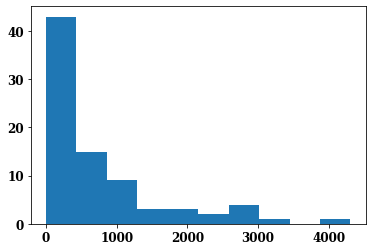

In [121]:
plt.hist(dfs_limited[-1][dfs_limited[-1]['p'] > 0.999]['frequencies']);